# Apéndice: Códigos.

# A. Diagrama de bifurcación y Exponentes de Lyapunov. 
Recuperado de: https://ipython-books.github.io/121-plotting-the-bifurcation-diagram-of-a-chaotic-dynamical-system/

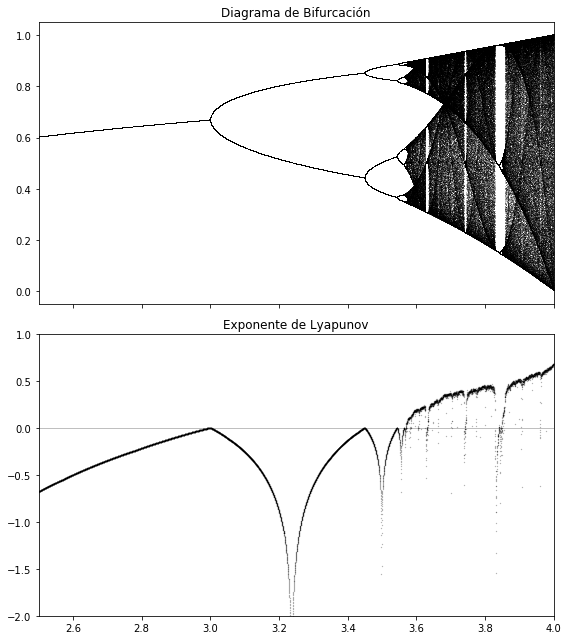

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def logistic(r, x):
    return r * x * (1 - x)

n = 10000
r = np.linspace(2.5, 4.0, n)

iterations = 1000
last = 100

x = 1e-5 * np.ones(n)

lyapunov = np.zeros(n)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(2.5, 4)
ax1.set_title("Diagrama de Bifurcación")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.k', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Exponente de Lyapunov")
plt.tight_layout()

# B. Fractales: Triángulo de Sierpinski.

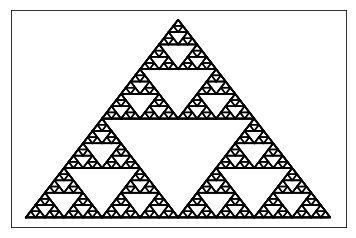

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math as mt

#Función que mide distancia entre 2 puntos.
def dis(a, b):
    dis = np.abs(a - b)
    return(dis)

def punto_medio(a, b):
    medio = (a + b)/2.
    return(medio)

def sierpinski(X, Y, N):
    
    if N == 0:
        plt.plot(X, Y, color='k')
        
    else:
        #Creación de las coordenadas para los vértices del primer triángulo interior de la izquierda.
        X1 = [X[0], dis(X[0], X[2])/4. + X[0], dis(X[0],X[2])/2. + X[0], X[0]]
        Y1 = [Y[0], dis(Y[0], Y[1])/2. + Y[0], Y[0], Y[0]]

        #Creación de las coordenadas para los vértices del segundo triángulo interior arriba.
        X2 = [dis(X[0], X[2])/4. + X[0], dis(X[0],X[2])/2. + X[0], dis(X[0],X[2])*(0.75) + X[0], dis(X[0], X[2])/4. + X[0]]
        Y2 = [dis(Y[0], Y[1])/2. + Y[0], dis(Y[0], Y[1]) + Y[0], dis(Y[0], Y[1])/2. + Y[0], dis(Y[0], Y[1])/2. + Y[0]]

        #Creación de las coordenadas para los vértices del tercer triángulo interior a la derecha.
        X3 = [dis(X[0],X[2])/2. + X[0], dis(X[0],X[2])*(0.75) + X[0], dis(X[0],X[2]) + X[0], dis(X[0],X[2])/2. + X[0]]
        Y3 = [Y[0], dis(Y[0], Y[1])/2. + Y[0], Y[0], Y[0]]
        
        #Graficación de cada uno de los "subtraingulos"
        plt.plot(X1, Y1, color='k')
        plt.plot(X2, Y2, color='k')
        plt.plot(X3, Y3, color='k')
    
        sierpinski(X1, Y1, N - 1)
        sierpinski(X2, Y2, N - 1)
        sierpinski(X3, Y3, N - 1)
    
    return()

#Puntos fijos iniciales del triángulo principal.
fixedX = [0, 0.5, 1, 0]
fixedY = [0, mt.pi/3., 0, 0]

iteraciones = 5

plt.figure()
sierpinski(fixedX, fixedY, iteraciones)
plt.xticks([])
plt.yticks([])
plt.show()

# C. Mapeos.

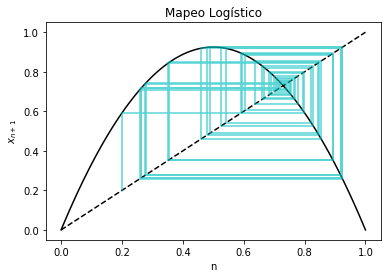

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math as mt

#Se definen funciones para los  mapeo y la recta de 45 grados.
def logistic(x, alpha):
    return(alpha*x*(1 - x))

#Se definen los diferentes mapeos a investigar. Debido a que la estructura de graficación para cada uno de ellos es muy similar
#basta solo agregar diferentes funciones y cambiar variables dentro de la secuencia principal de instrucciones.
def gauss(x, alpha):
    return(np.exp(-alpha*x**2) + beta)
    
def map_lin(x):
    return(x)
    
n = 99
alpha, beta = 3.7, -0.58

X = np.linspace(0, 1, 100)
Y = logistic(X, alpha)
Y1 = map_lin(X)

#Arreglos necesarios para graficar las rectas que describen las bifurcaciones.
B = np.zeros(n)
T = np.zeros(n)
#Valores iniciales.
T[0] = 0.2
B[0] = 0.2
i = 1

#Generador de los puntos de la trayectoria de las bifurcaciones.
while i < n - 1:
    T[i] = T[i - 1]
    B[i] = logistic(T[i], alpha)
    T[i + 1] = B[i]
    B[i + 1] = B[i]
    i = i + 2
    

plt.plot(X, Y, color='k')
plt.plot(X, Y1, color='k', linestyle='--')
plt.plot(T, B, color='c', alpha = 0.65)
plt.title('Mapeo Logístico')
plt.xlabel('n')
plt.ylabel('$x_{n + 1}$')
plt.show()

# D. Atractor de Lorenz.

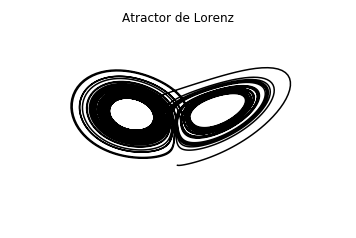

In [5]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from mpl_toolkits.mplot3d import axes3d

a = 18.
b = 28.
c = 2.667


def lorenz_attractor(X, t, a, b, c):
    x, y, z = X
    
    x_dot = a*(y - x)
    y_dot = x*(b - z) - y
    z_dot = x*y - c*z 
    
    return x_dot, y_dot, z_dot

X0 = [0, 1.0, 1.05]

t = np.linspace(0, 50, 10000)

#Resolver las ecuaciones del atractor de Lorenz.
solution = odeint(lorenz_attractor, X0, t, args=(a, b, c))
#Asignar cada columna de la matriz solución a una sola variable para simplificar la escritura.
x, y, z = solution.T

#Pasar las soluciones a matrices de dos dimensiones para poder usar "plot_wireframe".
X = np.array([x])
Y = np.array([y])
Z = np.array([z])

#Graficar
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(X, Y, Z, color='k')
plt.title('Atractor de Lorenz')
ax.set_axis_off()
plt.show()

# E. Atractor de Rössler.

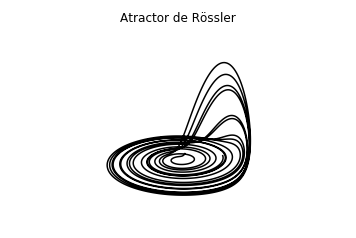

In [6]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from mpl_toolkits.mplot3d import axes3d

a = 0.2
b = 0.2
c = 5.7


def lorenz_attractor(X, t, a, b, c):
    x, y, z = X
    
    x_dot = - y - z
    y_dot = x + a*y
    z_dot = b + z*(x - c)
    
    return x_dot, y_dot, z_dot


X0 = [0, 1.0, 1.05]

t = np.linspace(0, 100, 10000)

#Resolver las ecuaciones del atractor de Lorenz.
solution = odeint(lorenz_attractor, X0, t, args=(a, b, c))
#Asignar cada columna de la matriz solución a una sola variable para simplificar la escritura.
x, y, z = solution.T

#Pasar las soluciones a matrices de dos dimensiones para poder usar "plot_wireframe".
X = np.array([x])
Y = np.array([y])
Z = np.array([z])

#Graficar
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(X, Y, Z, color='k')
ax.set_axis_off()
plt.title('Atractor de Rössler')
plt.show()